In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [174]:
train = pd.read_csv("titanic_train.csv")

In [175]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


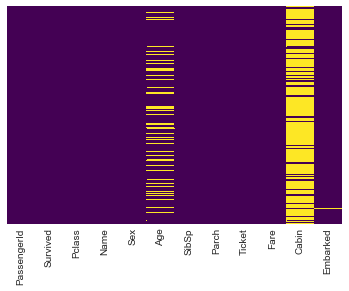

In [176]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap = "viridis")

In [177]:
sns.set_style("whitegrid")

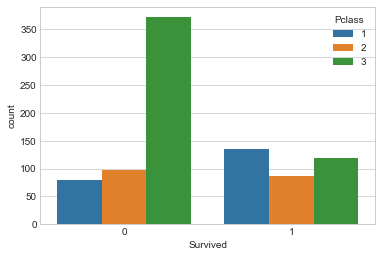

In [178]:
sns.countplot(x ="Survived",hue = "Pclass", data = train)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



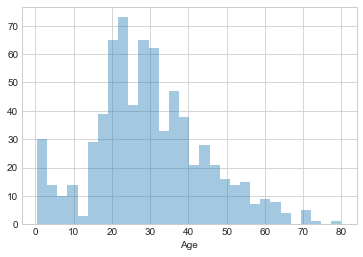

In [179]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

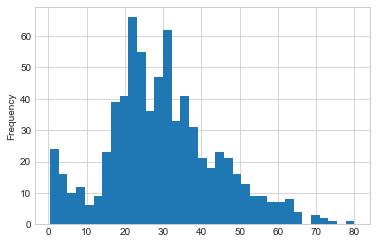

In [180]:
train["Age"].plot.hist(bins =35)

In [181]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


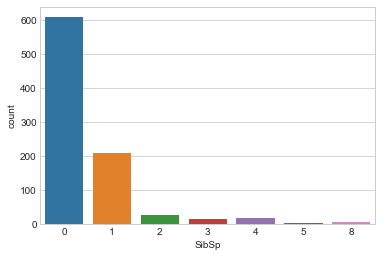

In [182]:
sns.countplot(x ="SibSp", data = train)

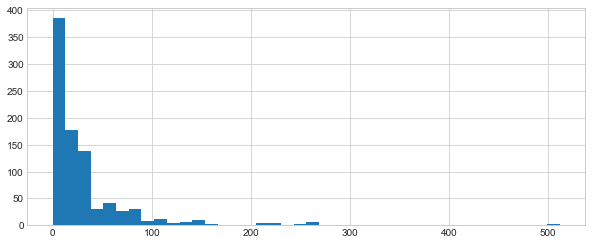

In [183]:
train["Fare"].hist(bins =40, figsize = (10,4))

<Figure size 1080x288 with 0 Axes>

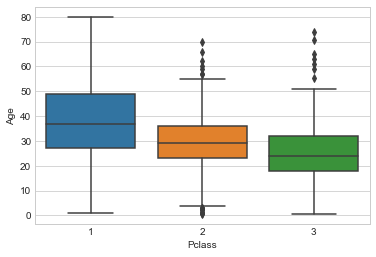

<Figure size 1080x288 with 0 Axes>

In [184]:
sns.boxplot(x ="Pclass", y ="Age", data = train)
plt.figure(figsize=(15,4))

In [185]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return train[train['Pclass'] == 1]["Age"].median()
        elif Pclass == 2:
            return train[train['Pclass'] == 2]["Age"].median()
        else:
            return train[train['Pclass'] == 3]["Age"].median()
    else:
        return Age
    
        

In [186]:
train["Age"] = train[["Age", "Pclass"]].apply(impute_age, axis =1)

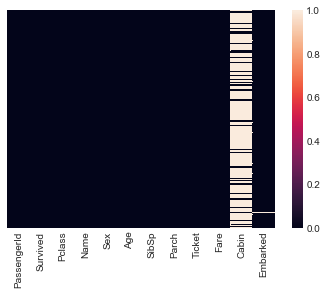

In [187]:
sns.heatmap(train.isnull(), yticklabels=False)

In [188]:
train.drop("Cabin", axis =1, inplace = True)

In [189]:
train.dropna(inplace = True)

In [190]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [191]:
embark = pd.get_dummies(train["Embarked"], drop_first=True)

In [192]:
train = pd.concat([train, sex, embark], axis =1)

In [193]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [194]:
train.drop(["Sex", "Embarked", "Name", "Ticket"], axis =1, inplace =True)

In [195]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [196]:
train.drop("PassengerId", axis =1, inplace = True)

In [197]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [198]:
X = train.drop("Survived", axis =1)
y = train["Survived"]

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [201]:
from sklearn.linear_model import LogisticRegression

In [202]:
lgm = LogisticRegression()

In [203]:
lgm.fit(X =X_train, y =y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [204]:
predictions = lgm.predict(X_test)

In [205]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.82      0.86      0.84       167
          1       0.75      0.69      0.72       100

avg / total       0.80      0.80      0.80       267



In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
print(confusion_matrix(y_test, predictions))

[[144  23]
 [ 31  69]]


Trying the Naive Bayes Classifier 

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [209]:
NBC = GaussianNB()

In [210]:
NBC.fit(X_train,y_train)

GaussianNB(priors=None)

In [211]:
NBP = BNC.predict(X_test)

In [212]:
print(classification_report(y_test, NBP))

             precision    recall  f1-score   support

          0       0.84      0.81      0.82       167
          1       0.70      0.74      0.72       100

avg / total       0.79      0.78      0.78       267



Random Tree

In [213]:
from sklearn.ensemble import RandomForestClassifier

In [222]:
rfc = RandomForestClassifier(n_estimators=2000)

In [223]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [224]:
rfc_pred = rfc.predict(X_test)

In [225]:
print(classification_report(y_test, rfc_pred))

             precision    recall  f1-score   support

          0       0.81      0.84      0.83       167
          1       0.72      0.68      0.70       100

avg / total       0.78      0.78      0.78       267



Overall it seem like the Logistic regression preforms the best

# Making Pclass Dummy

In [47]:
Pclass= pd.get_dummies(train["Pclass"], drop_first=True)

In [48]:
train = pd.concat([train, Pclass], axis = 1)

In [49]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [50]:
train.drop("Pclass", axis =1, inplace =True)

In [51]:
X = train.drop("Survived", axis = 1)
y = train["Survived"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
lgm2 = LogisticRegression()

In [54]:
lgm2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
predictions2 = lgm2.predict(X_test)

In [56]:
print(confusion_matrix(y_test, predictions2))

[[148  19]
 [ 30  70]]


In [57]:
print(classification_report(y_test, predictions2))

             precision    recall  f1-score   support

          0       0.83      0.89      0.86       167
          1       0.79      0.70      0.74       100

avg / total       0.81      0.82      0.81       267



In [58]:
lgm2.score(X_test, y_test)

0.8164794007490637

# Using Title as catagory

In [59]:
def title(name):
    return name.split(",")[1].split(".")[0]

In [60]:
train2 = pd.read_csv("titanic_train.csv")

In [61]:
train2["Title"] =  train2["Name"].apply(title)

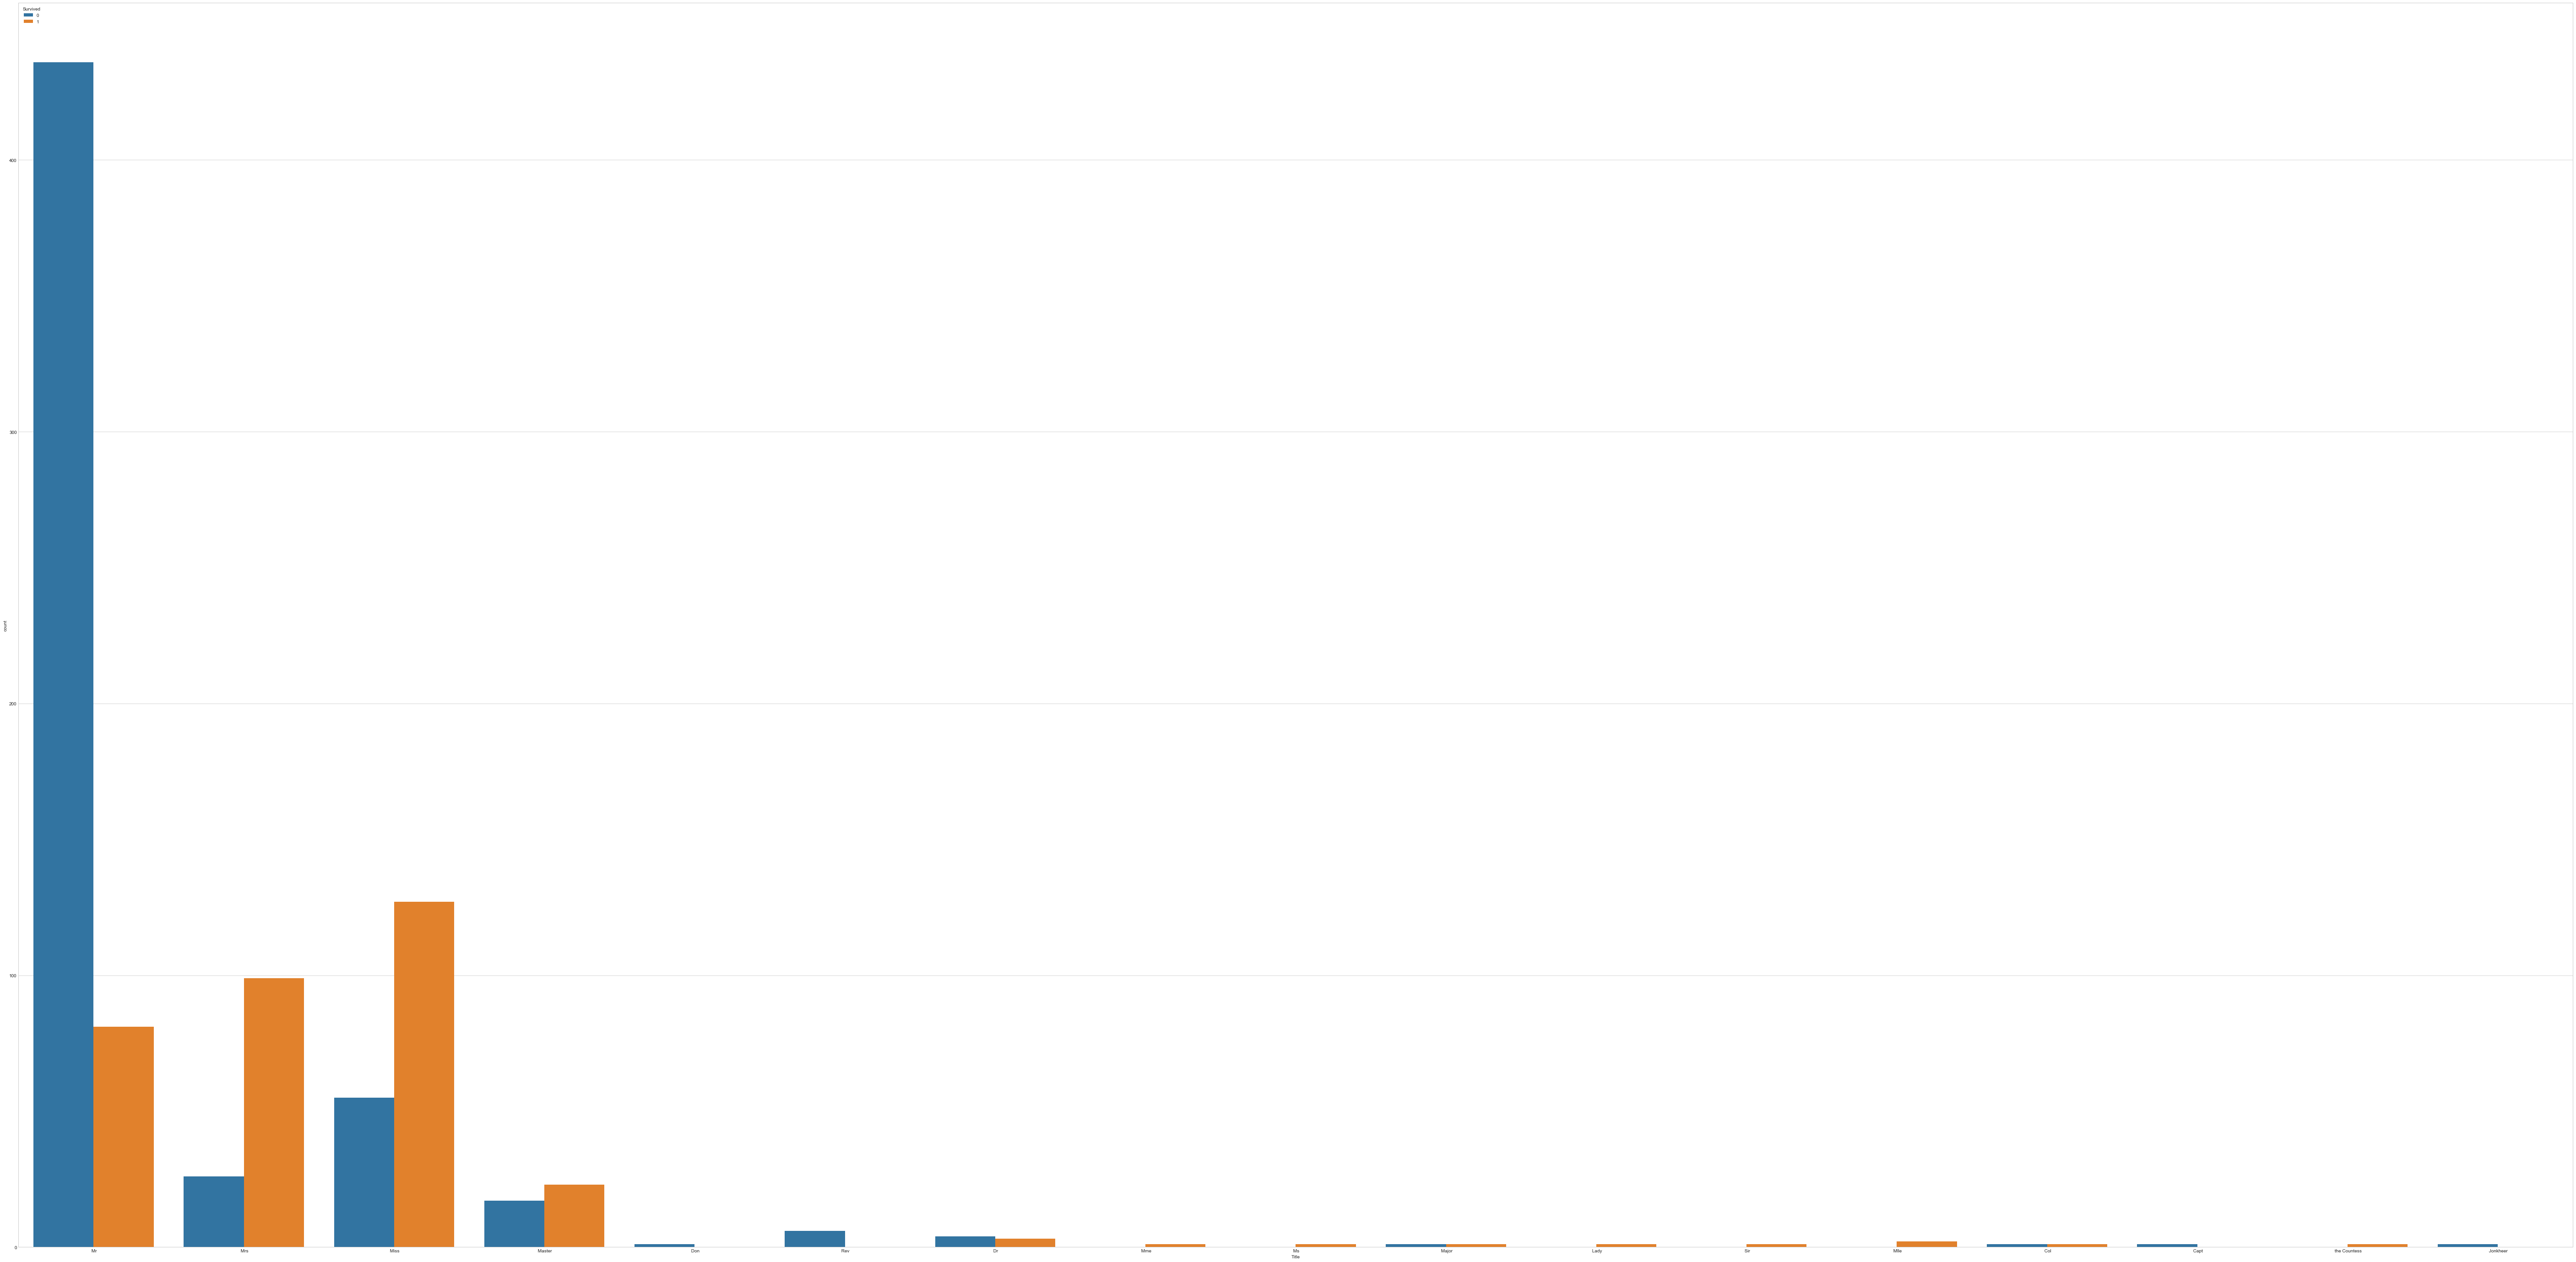

In [62]:
plt.figure(figsize=(100,50))
sns.countplot(x = train2["Title"], hue = train2["Survived"])
plt.savefig("Title.jpeg")

In [63]:
train2["Age"] = train2[["Age", "Pclass"]].apply(impute_age, axis =1)

In [64]:
train2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


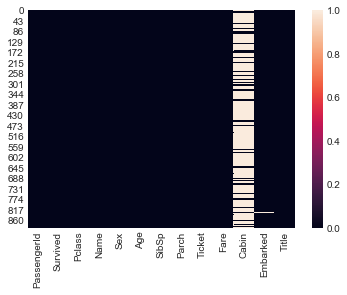

In [65]:
sns.heatmap(train2.isnull())

In [66]:
train2.drop("Cabin",axis =1, inplace = True)

In [67]:
train2.dropna(inplace = True)

In [68]:
sex = pd.get_dummies(train2["Sex"], drop_first = True)

In [69]:
embarked = pd.get_dummies(train2["Embarked"], drop_first = True)

In [70]:
title = pd.get_dummies(train2["Title"], drop_first = True)

In [71]:
pclass = pd.get_dummies(train2["Pclass"], drop_first = True)

In [72]:
train2 = pd.concat([train2, sex, embarked, title, pclass], axis = 1)

In [73]:
train2.drop(["Sex", "Embarked", "Name", "Ticket", "Pclass", "Title"], axis =1, inplace = True)

In [74]:
train2.drop(["PassengerId"], axis =1, inplace = True)

In [75]:
X2 = train2.drop("Survived", axis = 1)
Y2 = train2["Survived"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.3, random_state=42)

In [77]:
lgm3 = LogisticRegression()

In [78]:
lgm3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
predictions3 = lgm3.predict(X_test)

In [80]:
print(classification_report(y_test, predictions3))

             precision    recall  f1-score   support

          0       0.85      0.86      0.85       167
          1       0.76      0.74      0.75       100

avg / total       0.82      0.82      0.82       267



In [81]:
print(confusion_matrix(y_test, predictions3))

[[144  23]
 [ 26  74]]


Seems to be no improvement by adding title

# Testing on full dataset

In [82]:
Train = pd.read_csv("titanic_train.csv")

In [83]:
Train["Age"] = Train[["Age", "Pclass"]].apply(impute_age, axis =1)

In [84]:
Train.drop("Cabin",axis =1, inplace = True)

In [85]:
Train.dropna(inplace = True)

In [86]:
sex = pd.get_dummies(Train["Sex"], drop_first = True)
embarked = pd.get_dummies(Train["Embarked"], drop_first = True)
pclass = pd.get_dummies(Train["Pclass"], drop_first = True)

In [87]:
Train = pd.concat([Train, sex, embarked, pclass], axis = 1)

In [88]:
Train.drop(["Sex", "Embarked", "Name", "Ticket", "Pclass"], axis =1, inplace = True)

In [89]:
Train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


In [90]:
Train.drop(["PassengerId"], axis =1, inplace = True)

In [91]:
X_train = Train.drop("Survived", axis = 1)
y_train = Train["Survived"]

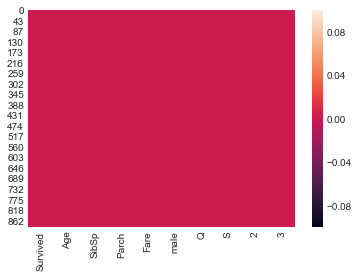

In [92]:
sns.heatmap(Train.isnull())

Cleaning the test data

In [93]:
Test = pd.read_csv("titanic_test.csv")

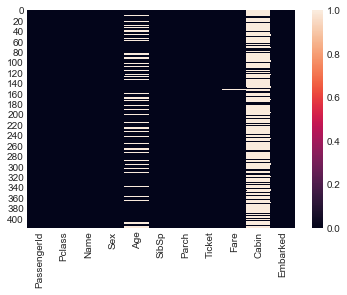

In [94]:
sns.heatmap(Test.isnull())

In [95]:
Test[Test['Pclass'] == 3]["Fare"].median()

7.8958

In [96]:
def impute_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):
        
        if Pclass == 1:
            return Test[Test['Pclass'] == 1]["Fare"].median()
        elif Pclass == 2:
            return Test[Test['Pclass'] == 2]["Fare"].median()
        else:
            return Test[Test['Pclass'] == 3]["Fare"].median()
    else:
        return Fare
    
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return Test[Test['Pclass'] == 1]["Age"].median()
        elif Pclass == 2:
            return Test[Test['Pclass'] == 2]["Age"].median()
        else:
            return Test[Test['Pclass'] == 3]["Age"].median()
    else:
        return Age
    
         

In [97]:
Test["Age"] = Test[["Age", "Pclass"]].apply(impute_age, axis =1)
Test["Fare"] = Test[["Fare", "Pclass"]].apply(impute_fare, axis =1)

In [98]:
Test.drop("Cabin",axis =1, inplace = True)

In [99]:
Test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S
417,1309,3,"Peter, Master. Michael J",male,24.0,1,1,2668,22.3583,C


In [100]:
sex = pd.get_dummies(Test["Sex"], drop_first = True)
embarked = pd.get_dummies(Test["Embarked"], drop_first = True)
pclass = pd.get_dummies(Test["Pclass"], drop_first = True)

In [101]:
Test = pd.concat([Test, sex, embarked, pclass], axis = 1)

In [102]:
Test.drop(["Sex", "Embarked", "Name", "Ticket", "Pclass"], axis =1, inplace = True)

In [103]:
Test.head()

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,892,34.5,0,0,7.8292,1,1,0,0,1
1,893,47.0,1,0,7.0000,0,0,1,0,1
2,894,62.0,0,0,9.6875,1,1,0,1,0
3,895,27.0,0,0,8.6625,1,0,1,0,1
4,896,22.0,1,1,12.2875,0,0,1,0,1


In [104]:
Test.drop(["PassengerId"], axis =1, inplace = True)

In [105]:
X_test = Test

Fitting the data

In [106]:
LG = LogisticRegression()

In [107]:
LG.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [108]:
Predictions = LG.predict(X_test)

In [109]:
FTest = pd.concat([Test, pd.Series(Predictions, name = "Survived")], axis = 1)

In [110]:
pd.Series(Predictions)

0      0
1      0
2      0
3      0
4      1
5      0
6      1
7      0
8      1
9      0
10     0
11     0
12     1
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     1
24     1
25     0
26     1
27     0
28     0
29     0
      ..
388    0
389    0
390    1
391    1
392    0
393    0
394    0
395    1
396    0
397    1
398    0
399    0
400    1
401    0
402    1
403    1
404    0
405    0
406    0
407    0
408    1
409    1
410    1
411    1
412    1
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int64

In [111]:
FTest

,Age,SibSp,Parch,Fare,male,Q,S,2,3,Survived
0,34.5,0,0,7.8292,1,1,0,0,1,0
1,47.0,1,0,7.0000,0,0,1,0,1,0
2,62.0,0,0,9.6875,1,1,0,1,0,0
3,27.0,0,0,8.6625,1,0,1,0,1,0
4,22.0,1,1,12.2875,0,0,1,0,1,1
5,14.0,0,0,9.2250,1,0,1,0,1,0
6,30.0,0,0,7.6292,0,1,0,0,1,1
7,26.0,1,1,29.0000,1,0,1,1,0,0
8,18.0,0,0,7.2292,0,0,0,0,1,1
9,21.0,2,0,24.1500,1,0,1,0,1,0


In [112]:
KTest = pd.concat([pd.read_csv("titanic_test.csv"), FTest["Survived"]], axis =1)

In [113]:
KTest.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [114]:
KTest.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], axis =1, inplace = True)

In [115]:
KTest.set_index("PassengerId", inplace = True)

In [116]:
KTest.to_csv("TitanicKaggle Upload.csv")

Attempt 1, score: 0.76% 